In [1]:
import numpy as np
from common_functions.common_funs import *
from ifn import *
# init params and objects
feature_num, item_num = 10, 3
X = np.random.randint(2, size = (item_num, feature_num))
M = np.zeros((item_num, feature_num))
for i in range(item_num):
    M[i, i : i + 2] = 1
    M[i, 2 * i : 2 * i + 2] = 1
divcat, subcat = [inhibitory_feedback_network(M, k) for k in ['div', 'sub']]
cats = [divcat, subcat]

In [2]:
epoch = 100
rate = 0.1
epsilon = 0.001
testvector = randomise_abit(X[0], 0)
divkey, subkey = [c.recognise(testvector, epoch, rate, epsilon) for c in cats]

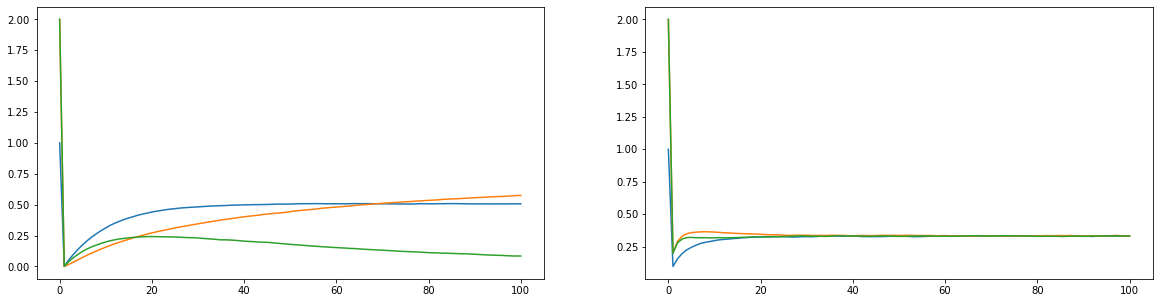

In [3]:
import matplotlib.pyplot as plt
epochs = range(epoch + 1)
fig_2met, ax_2met = plt.subplots(1, 2, figsize = (20, 5))
for ax, k in zip(ax_2met, [divkey, subkey]):
    ax.plot(epochs, k)

In [4]:
M

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0.]])


# init params
x_num, y_num = 500, 100
item_num = 3
Y = np.random.randint(2, size = (item_num, y_num))
Xfin, Yfin = , inhibitory_feedback_network('d')
Xfin.setup_matrix(X), Yfin.setup_matrix(Y)

epoch = 1000
key1 = Xfin.recognise(X[0], epoch)
outputs1 = np.dot(key1, Y)
key2 = Yfin.recognise(Y[0], epoch)
outputs2 = np.dot(key2, X)

diff1x = np.max(np.abs(key1 - [1,0,0]), axis = 1)
diff2y = np.max(np.abs(key2 - [1,0,0]), axis = 1)
diff1y = np.max(np.abs(outputs1 - Y[0]), axis = 1)
diff2x = np.max(np.abs(outputs2 - X[0]), axis = 1)

import matplotlib.pyplot as plt
epochs = range(epoch + 1)
fig, ax = plt.subplots(1, 2)
ax[0].plot(epochs[1:], diff1x[1:])
ax[1].plot(epochs[1:], diff2y[1:])
ax[0].plot(epochs[1:], diff1y[1:])
ax[1].plot(epochs[1:], diff2x[1:])
ax[0].set_xscale('log')
ax[1].set_xscale('log')
# coupling between X and Y through episodic key